### **Problem Specification - Team Allocation Application**

### **1. Project Overview:** 
Develop a Team Allocation application to assist the course coordinator of "Introduction to Data Science" at NTU in organizing a group of 6,000 students into 120 tutorial groups, each consisting of 50 students. We also have to form teams where the teams are to be formed only using members from the same tutorial group (i.e., no team can contain two members from different tutorial groups). Each team should consist of five students and the application must ensure fairness and diversity when forming the team by considering factors such as school affiliation, gender, and current CGPA. This application will first analyze the CSV file (records.csv) containing student records, perform the necessary tasks, and then generate a new CSV file as the output.

**Functional Requirements:**

a) To analyse the student list and separate into various groups according to:

*   School affiliation: To ensure a mix of knowledge and skils. No team should have majority of same school. Balanced division of stem and non-stem schools.
*   Gender: To promote gender diversity. No teams should have majority of same gender.
*   CGPA: To balance academic performance. No team should have majority of students with high or low CGPA.

b) To form and allocate teams by using the data provided in the records.csv file.

c) Evaluation of algorithm by examining the diversity of the team it forms.

d) To store the final result in a 'Team Assigned' column in a new csv file.

**Non-functional Requirements:**

a) To apply computational thinking and programming concepts to solve the issue.

b) Jupyter notebook is presented in a clear and detailed manner and we have to ensure that the code runs properly.

---




### **2. Decomposition:**



1. Reading the CSV File (records.csv) containing the data of 6,000 students enrolled in the course of "Introduction to Data Science" at NTU.

2. Map each school to a broad category, such as ‘STEM’ or ‘NON-STEM’.

3.	Group the students by their tutorial groups for easier sorting. This ensures that each team has members only from their respective tutorial groups.

4. First, we make initial teams, and then we use the other functions to make balanced teams

4.	Sort the students into teams of 5, ensuring fairness and diversity. When forming the teams the following factors must be considered:

       o	Current CGPA- Teams should be balanced by ensuring that no team consists entirely of students having very high
            or very low CGPAs.

       o	Category - Each team should contain students from different categories.

       o	Gender- There should be no team that consists entirely of boys or entirely of girls.

5.	Using the helper functions count_values, team_is_cgpa_predominant and asses_group_violation.

      o	count_value – This function counts how many times each unique item appears in the list called student_list.
           If the item is not found then it returns 0 as default.

      o	team_is_cgpa_predominant- This function is used to check whether the team is balanced in terms of CGPA.
           If there are more than four students in the group who have either very high CGPA or very low CGPA it
           returns true which indicates that the team is not balanced by CGPA.

      o	asses_group_violation – This function is used to check if there are any violations in any of the groups.

6.	Teams are now balanced, and the new column ‘Team Assigned’, has been added.

7.	Output: Writing a new CSV File with sorted groups.


---




### **3. Pattern Recognition:**



* Identify key attribites for patterns -
  * This program helps us to analyze the data and also helps us to assign the students in groups of five while ensuring diversity and fairness.

  * The program also helps us to add the remaining students to the teams.

* Pattern solutions:
  * We created helper functions that helped us to sort the teams in a manner which ensured that we follow all the necessary factors.
  * To solve the issue, we prioritized the factors in the following order: Gender > Category > CGPA

---



### **4. Algorithm Design - Team Allocation Application**

#### Algorithm Design Steps

- **Data Loading**: Read and structure data by tutorial groups.
- **Grouping by Attributes**: Group students by gender and CGPA for easier assignment.
- **Team Assignment**: Use constraints to assign students while balancing gender, CGPA, and school representation.
- **Diversity Evaluation**: Calculate and record diversity scores for gender, school, and CGPA for each team.
- **Output**: Save team data with diversity scores to a CSV.

1. **Input Processing and Data Organization**
   - **Loading and Organizing Data**:
     - Load data from CSV file  
     - Reads each row, skips if incomplete or CGPA missing/invalid.
     - Extracts fields, classifies school to category.
     - Appends as a dictionary to the rows list.
     - Pre- sort the students within each tutorial group based on Gender, Category and CGPA in descending order
     - Then we sort out with the stratified teams function, then shuffle the index of the students in the allocated team.
      

2. **Diversity Constraints and Criteria Definition**
   - This part defines rules for team composition:
     - **Gender**: Highest priority: Each team should have no more than 3 Males and 2 Females or vice versa.
     - **Category**: Middle priority: We group students based on whether their major is stem based or non-stem based. Each team should not be entirely made of students from
     - **CGPA**: - Least Priority: Each team should not have more than 3 students from the bottom or top 20th percentile.


3. **Team Formation Logic (Core Algorithm)**
   - We form balanced teams by grouping the students based on the above constraints.
   - Using helper functions such as sorting_of_cgpa_list and other functions for category and gender for violation capture and further analysis.
   - After the team is formed, we check if it satisfies the conditions. If it does, we will ‘lock’ the team to prevent further swaps from happening for that team, else we will continue to swap.
   - We start by assigning Team A and B, which is the next team incremented by 1. Beneficial swaps are found by assigning weights to the conditions, e.g. Gender is most important so the weight is 3, which will then multiply the functions that will return True(1) or False(0).
   - We add the values of both Team A and B, and compare the sum of the values before and after the swap. If beneficial swap occurred between student of Team A to Team B, e.g. After < Before, we keep the swap and vice versa. Then we will move to the next student inside the team.
   - If all teams are fully ‘locked’, e.g. all satisfy the conditions, then we will exit the tutorial group and move to the next one. We also set a limit of 15 times, where if there are no improvements made, we can move to the next tutorial group to


4. **Diversity Evaluation**
   - Once teams are formed, the algorithm calculates diversity metrics to evaluate how well the constraints were met.
   - **Diversity Metrics**:
     - **Gender Diversity**: ``team_has_gender_majority` checks the balance of males and females in each team, if it violates the quota that we set, then it will return True (1).
     - **School Diversity**: team_has_category_majority` assesses the distribution of stem and non-stem students within the team,  if it violates the quota that we set, then it will return True (1).
     - **CGPA Diversity**: `team_is_CGPA_predominant` measures the CGPA.  if it violates the quota that we set, then it will return True (1).

5. **Output Processing**
   - After team assignments, the algorithm saves the final team list to a CSV. Each team includes assigned diversity scores, giving a clear view of how well each team meets the diversity goals.
   - The `save_teams_to_csv` function writes each student’s details and team diversity metrics to a CSV for easy review.

#### final_rows is the list that we will be used to write into the csv
#### summary is a tuple that will hold any errors faced during the process

# **Explanation of code**

# 1. **Librarys to install**
1) time- To measure the runtime duration of the whole program and each tutorial group processing.
2) random- To shuffle students within teams for randomness in assignments.
3) CSV- For reading from and writing to CSV files, which hold the student records data.
4) matplotlib.pyplot- The plotting library to display and customise the visualisations.
5) collections.defaultdict- To easily group students into strata by gender and category with default empty list initialization.
6) itertools- To cycle through teams repeatedly when distributing students into stratified teams.


# 2. **Input/Output files**
- Output to another .csv file called record_results

# 3. **School_Category**
- Categorised different Schools into either STEM and NON-STEM. This allows us to sort groups equally and more efficiently reducing time of output



  



In [ ]:
import time
import random
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

# add a time counter to track the duration of the program
start = time.time()

input_path = "/Users/aniketmajee/Desktop/records.csv"
#REMEMBER TO CHANGE THIS BEFORE RUNNING so that you get another file with the results
output_path = "/Users/aniketmajee/Desktop/records_result.csv"

# map each school to a broad category
school_category = {
    # STEM
    'SCSE': 'STEM',
    'CCDS': 'STEM',
    'MAE': 'STEM',
    'EEE': 'STEM',
    'CEE': 'STEM',
    'SPMS': 'STEM',
    'MSE': 'STEM',
    'WKW SCI': 'STEM',
    'ASE': 'STEM',
    'LKCMedicine': 'STEM',
    'CoE': 'STEM',
    'CCEB': 'STEM',
    # NON-STEM
    'NBS': 'NON-STEM',
    'SSS': 'NON-STEM',
    'ADM': 'NON-STEM',
    'SoH': 'NON-STEM',
    'CoB (NBS)': 'NON-STEM',
    'SBS': 'NON-STEM',
    'NIE': 'NON-STEM',
    'HASS': 'NON-STEM'
}



# 4. **CSV Data Loading and Preprocessing**
- Opens the CSV file at input_path using open() function and passes it to csv.reaader() which reads the file line-by-line as lists of string
- The first row (header) is read using next(reader). This skips the header when capturing column names such as "Tutorial Group" and "CGPA".
- A dictionary header_map is created by mapping each lowercase header name to its column index. This will allow flexible column reading and access regardless of sorted or not sorted
- Another dictionary idx is created that maps expected column name to the respective index in the CSV using header_map, ensuring the program knows where each

- Each correct row is converted to dictionary with keys matching the expected columns plus the computed 'Category'.
- Lastly it prints and confirms everything has been loaded in correctly

In [ ]:
# Expected headers
expected_cols = ['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA']

# Load data into dictionary
rows = []
with open(input_path, newline='') as student_file:

    # create an iterator that reads each line of CSV file as a list of strings
    reader = csv.reader(student_file)

    '''
    advance the internal reader by one row, and store the first row as a LIST to the variable header
    so that you can skip the first row of the file(which does not contain data
    '''


    header = next(reader)
    header_map = {h.strip().lower(): i for i, h in enumerate(header)}
    # i refers to the index, h refers to the element in the created list of variable reader
    # create a dictionary with key that is the element, value is the index
    '''
    {key expression : value expression for item in iterable}

    1. assign the elements inside the list expected_cols as the key,
    value of the corresponding key is the value from 2.

    2. looking for the key that is lowercase and same name as the element inside header_map, and assign the
    value of that key-value pair inside header_map to the value of the
    key-value pair of the expected_cols list.

    3. now assign the new key and values to the dictionary called idx
    '''

    idx = {col: header_map[col.lower()] for col in expected_cols}#enumerate means to add 1/2/3 for every header

    for r in reader:
        if len(r) < len(header):
            continue
        cgpa_str = r[idx['CGPA']].strip()
        if not cgpa_str:
            continue
        try:
            cgpa = float(cgpa_str)
        except ValueError:
            continue
        gender = r[idx['Gender']].strip()#.strip allows you to remove any whitespaces when finding word

        school = r[idx['School']].strip()

        # output unknown if the category is not found in the dictionary
        category = school_category.get(school, 'UNKNOWN')

        #add all the different headers and respective elements into the row list
        rows.append({
            'Tutorial Group': r[idx['Tutorial Group']].strip(),
            'Student ID': r[idx['Student ID']].strip(),
            'Name': r[idx['Name']].strip(),
            'School': school,
            'Category': category,
            'Gender': gender,
            'CGPA': cgpa
        })

# confirm if everything is loaded properly
print(f"Loaded {len(rows)} student records.")

# **5. Grouping of Tutorial Group**
- As changes or sorting can only be donw within tutorial groups, need to further split each student in their tutorial group
Say and delete this For script(next lines explain how to group each student into their respective Tutorial groups. If they are the first member in the group, a new a new empty set is created)


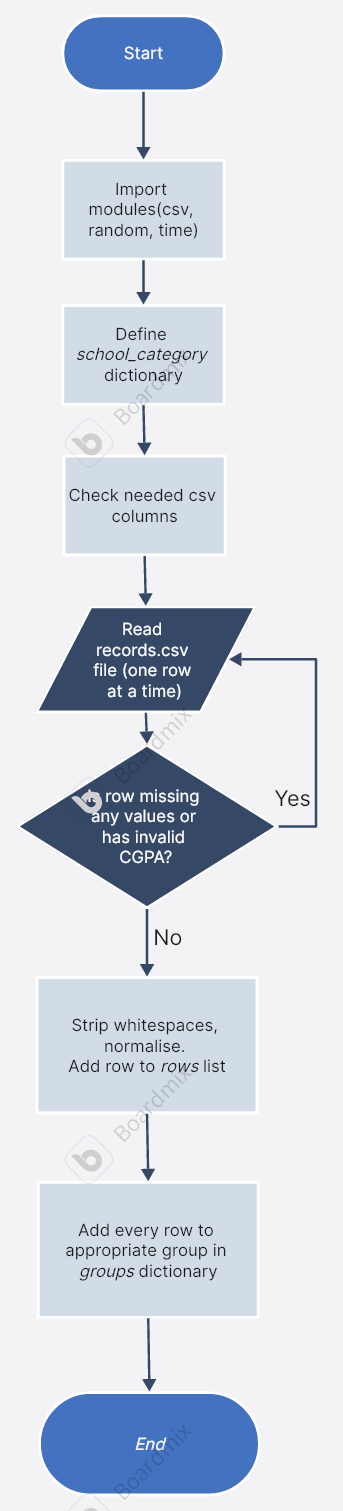

In [ ]:
# --- Group by Tutorial Group ---
groups = {}
for row in rows:#rows is dictionary that represents student record's
    tg = row['Tutorial Group']#next lines explain how to group each student into their respective Tutorial groups. If they are the first member in the group, a new a new empty set is created
    if tg not in groups:
        groups[tg] = []
    groups[tg].append(row)


# 6. Helper Functions
**Purpose of Helper Functions?** Helper functions break code into smaller, reusable parts that handle specific tasks. They make the main program easier to read and manage by grouping repeated or complex steps together.

- sorting_of_cgpa_list: Sorts the student list in ascending order. Splits it into 2 half( high and low list ). Then it combines elements from lower and higher alternately
- count_values: Counts the occurence of each unique item in the list and returns a dictionary with item frequencies. This helps to count how many students belong to categories or genders, for later checks on majority.
- team_has_category_majority: For STEM vs NON-STEM, checks if any single category has more than 3 members in the team.  Returns True if such a majority exists, showing lack of diversity in academic categories in that team.
- team_is_cgpa_predominant: Checks if there is a disparity of Higher/Lower GPA in a group if there is eg. 4 High GPA from the group, it will return True

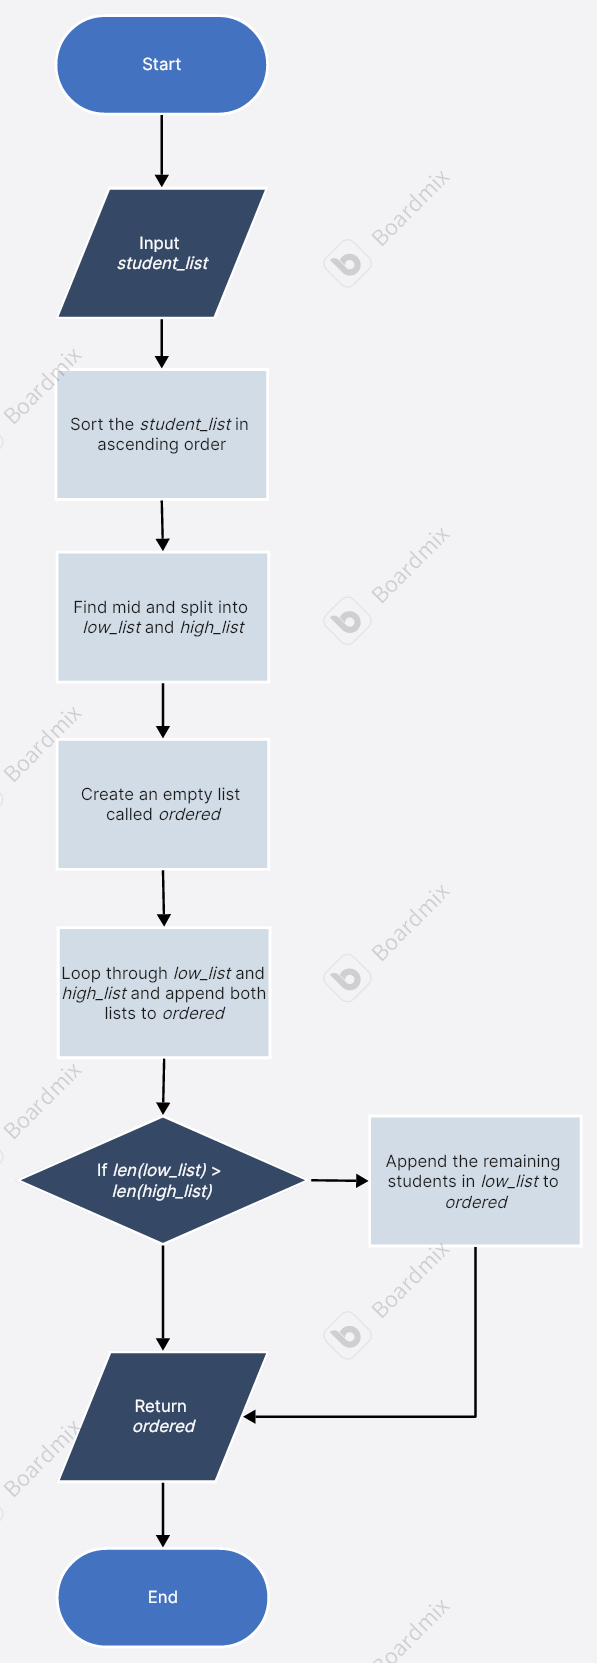

In [ ]:
# --- Helper Functions ---

# Return a list interleaving low/high CGPA to spread ability.
def sorting_of_cgpa_list(student_list):
    sorted_list = sorted(student_list, key=lambda x: x['CGPA'])#sorts the student_list in ascending order
    mid = (len(sorted_list) + 1) // 2 # find the middle point of the list which separates the higher half and bottom half
    low_list = sorted_list[:mid]       # Lower half (lowest CGPAs)
    high_list = sorted_list[mid:]      # Higher half (highest CGPAs)
    ordered = []
    for low_student, high_student in zip(low_list, high_list): # zip allows u to pair low_list with high_list student
        ordered.append(low_student)
        ordered.append(high_student)

    if len(low_list) > len(high_list):#in case there is more low students in low_list of students in either list, add the extra lowlist in the end
        ordered.append(low_list[-1])

    return ordered


def count_values(items):
    counts = {}
    for i in items:
        counts[i] = counts.get(i, 0) + 1 #tries to get a current count of each unique 'i' in the dictionary. If 'i' is not found it returns to 0 as default.

    return counts

def team_has_category_majority(team):# if there is more than 3 students in the same course
    categories = [m['Category'] for m in team]
    for v in count_values(categories).values():
        if v > 3:
            return True
    return False

def team_has_gender_majority(team):# if there is more than 3 students with the same gender
    genders = [m['Gender'] for m in team]
    for v in count_values(genders).values():
        if v > 3:
            return True
    return False

def team_is_cgpa_predominant(team, top_set, bottom_set):#checks the top 20% extremes from both ends
    top_count = 0
    for m in team:
        if m['Student ID'] in top_set:
            top_count += 1

    bottom_count = 0# Count how many students in the team are from the bottom 20% CGPA group
    for m in team:
        if m['Student ID'] in bottom_set:
            bottom_count += 1

    if top_count >= 3 or bottom_count >= 3: # Return True if 3 or more students are from either extreme group
        return True
    else:
        return False


# 7. **Making the initial group**
- Initialise a defaultdict with length 5. This will group students by the combined criteria(gender and category)
- for s in students: Loops over all students and appends each student to a list keyed by their (Gender, Category) tuple in strata.
- Sorts each student's list in decending CGPA orfer(preparing for balance from the start)
- initialise an empty list of teams, rach represented as an empty list
- Uses a Round-Robin loop to distribute students (use the itertool.cycle which helps to give index 0-4, and keep repeating until all students are indexed)
-this returns teams which will then be used for accessing violations


# 8. **Assessing the violations**
- assess_group_violations: evaluated a list of teams from above. If any of the groups violate the Helper functions above, it will return a summary dictionary with counts of the violations from all the teams. The violations will be further assessed and fixed later on.



In [ ]:
def make_stratified_teams(students, size=5):#Defines a function to create teams of a 5 from a list of student records.
    strata = defaultdict(list)
    for s in students:
        strata[(s['Gender'], s['Category'])].append(s)
    for key in strata:
        strata[key].sort(key=lambda x: x['CGPA'], reverse=True)
    num_teams = ceil_div(len(students), size)
    teams = [[] for _ in range(num_teams)]
    team_cycle = itertools.cycle(range(num_teams))
    for group in strata.values():
        for student in group:
            team_idx = next(team_cycle)
            teams[team_idx].append(student)
    return teams



def assess_group_violations(teams, top_set, bottom_set):
    gender_majority_count = 0
    cgpa_predominant_count = 0
    category_majority_count = 0
# check the teams for any violation
    for team in teams:
        if team_has_category_majority(team):
            category_majority_count += 1
        if team_has_gender_majority(team):
            gender_majority_count += 1
        if team_is_cgpa_predominant(team, top_set, bottom_set):
            cgpa_predominant_count += 1

    # Return a dictionary with total counts of each violation
    return {
        'category_majority': category_majority_count,
        'gender_majority': gender_majority_count,
        'cgpa_predominant': cgpa_predominant_count
    }

def team_is_stable(team, top_set, bottom_set):
    return (
        not team_has_gender_majority(team) and
        not team_has_category_majority(team) and
        not team_is_cgpa_predominant(team, top_set, bottom_set)
    )



# 9. **Other miscellaneous helper functions**


*   swap_members will swap students from different teams based on the index of the student within the team, with the help of the enumerate function that will allocate the index
*   ceil_div helps to round up to the next closest whole number, which allows us to assign students to a team even if there are less than 5 students within the team  



In [ ]:
# swap members of the team based on the index of the member within the team
def swap_members(team_a, i, team_b, j):
    team_a[i], team_b[j] = team_b[j], team_a[i]


def ceil_div(a, b): #this helps to exactly count the correct number of teams. Issue is that // function rounds down, but if there is ex. 2.65 groups required from division, then I would want to round up to 3 groups not down to 2 groups
    return (a + b - 1) // b

# Main block of code

# This involves mostly the part about sorting so we can break it down into smaller parts

# Decomposition
1. Allocate students to STEM or NON STEM based on their major
2. ID the top 20% and bottom 20% to help with CGPA sorting
3. pre-sort the teams, and then sort them out + shuffle the order
4. Start swapping the members in each team with the adjacent team, if all the groups are satisfactory then we can skip to the next group
5. Call the 3 helper functions and calculate if the group satisfies the conditions better before or after the swap, if after is better than keep the swap
6. If the teams are stable, which is when they satisfy the 3 conditions then add the group to locked teams and dont touch them anymore
7. Continue to sort the remaining groups
8. Break out of sorting if all teams are locked or if there are no possible consecutive improvements in 15 tries

# Abstraction
1. Get a new student dictionary that has key student information
2. Receive a set of ordered and unique ids for the top and bottom 20% of students based on cgpa
3. Get groups that have been sorted once
4. Get some groups that satisfy the three conditions and some that doesnt
5. Append the new sorted groups with better diversity into the list, with all their information  

# Pattern recognition
1. Feature identification:
*     Is there a mix of students from STEM and NON STEM students?
*     Is there a mix of males and females students?
*     Is there a mix of high and low CGPA students?

### filter the groups based on these factors and separate them
### this categorization helps to decide if the groups need further sorting or not
    
2. Create repeatable solutions
    * Create nested loops and functions for these tasks, the nested loops allow the program to proceed to the next group automatically while the nested functions are able to use variables defined in the enclosing function

# Algorithm design

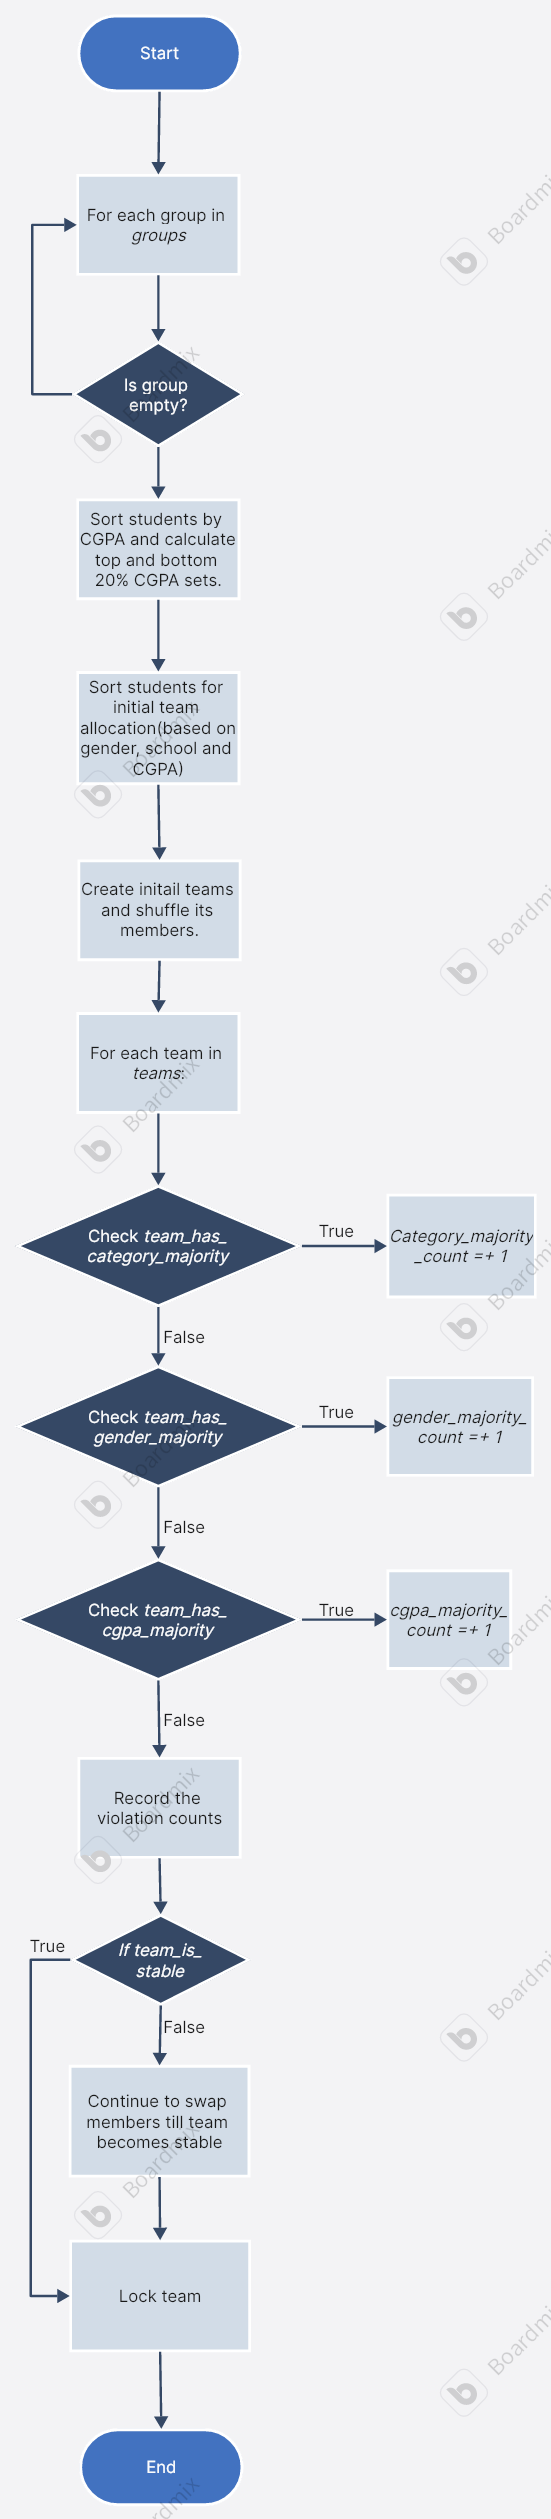

In [ ]:
final_rows = []
summary = {}


# we want to access the key value pairs in groups so we use groups.items
# tg is the tutorial group name
# students is the list of student dictionaries in that group
# Start a time counter for within the group too to check if the program is working
for tg, students in groups.items():
    time_group_start = time.time()
    # once there are no more students to sort, move to the next group
    n = len(students)
    if n == 0:
        continue



# 10. Creation of unique identifiers for the top/bottom 20% of students
### 1. use the sorted() method to arrage the students in descending order within the tutorial group. Then use the max and ceil_div function to ensure that there is minimally 1 student that falls into the 20% and ceil div to find the actual number of students that falls into the 20% category
### 2. next use the set function to build a unique and ordered set of student IDs for checking against later for both the top and bottom 20% of students

In [ ]:
    # Determine top/bottom 20% for CGPA, and give them an unique identifier

    # use sorted() to sort the list of dictionaries based on CGPA and in descending order, and create a new list
    sorted_by_cgpa = sorted(students, key=lambda x: x['CGPA'], reverse=True)
    # identify the top 20% of students and ensure that there is at least 1 student
    top_cut = max(1, ceil_div(2 * n, 10))
    # build a set of student ids for the top 20% of students, slice list at the top 20%
    # in s, retrieve the value under the key of Student ID
    top_set = set(s['Student ID'] for s in sorted_by_cgpa[:top_cut])
    # build a set of student ids for the bottom 20% of students, slice list at the bottom 20%
    # in s, retrieve the value under the key of Student ID
    bottom_set = set(s['Student ID'] for s in sorted_by_cgpa[-top_cut:])

# 11. Pre balancing of teams and team formation
*   Sort the student list based on Gender, Category and CGPA. Then make the teams with make_stratified_teams.
*   Shuffle the order of students that are in place based on the new teams that are formed

In [ ]:

    # Initial teams
    # Pre-balance the order of students before team creation, by sorting so that allocation can be done in round robin
    # the minus sign before s['CGPA'] allows sorting in descending order, similar to reverse = True
    # Modify the students list
    students.sort(key=lambda s: (s['Gender'], s['Category'], -s['CGPA']))

    # Build initial teams
    teams = make_stratified_teams(students, size=5)

    # Shuffle the order of members in existing groups in place, does not exchange members to other groups yet
    for t in teams:
        random.shuffle(t)

# 12. Addition of flags for algorithm to know that it has finished sorting for each tutorial group
### 1. team_locked: This is a list that tracks if the formed groups satisfy all the three conditions which are determined through team_has_category_majority, team_has_category_majority and team_is_cgpa_predominant and we can exit the loop early if all the groups are  
### 2. max_iters: This is the total limit of the swaps that we will perform, so that we can reduce runtime
### 3. stable_count: This also allows the loop to exit out early, if there are no improvements made consecutively, then the loop will also exit and move onto the next tutorial group


In [ ]:

    # create a list that keeps track of the teams that are locked
    team_locked = [False] * len(teams)

    # set a max limit to prevent loop from running infinitely, longer will have more optimisation but will take longer
    max_iters = 6000
    stable_count = 0


# 13. Data tracking
### The function assess_group_violations help us to track any issues that arise during the sorting process so that we can analyse the errors later on and also to exit the loop early below

In [ ]:
    # we use _ and not i as we just need it to loop, the index does not matter.
    for _ in range(max_iters):

        # loop through each team in teams
        violations = assess_group_violations(teams, top_set, bottom_set)



# 14. Exit the loop early
### We will also utilise the above function to decide if we want to exit the loop early e.g. no violations within all the teams, then we can move onto the next tutorial group.
### Also, if all the teams

In [ ]:

        # get the sum of all the values in the dictionary of violations
        total = sum(violations.values())
        # break if all teams have been locked or there are no violations
        if total == 0 or all(team_locked):
            break

        improved = False


# 15. Order of the students that will be sorted
### 1. With the first 2 for loops, we will compare the first 2 groups against each other
### 2. With the second 2 for loops, we will compare the 5 students against each other within the 2 groups

In [ ]:

        # compare with the team next door, instead of comparing every single team
        # against each other which can help to reduce runtime
        for a_idx, team_a in enumerate(teams):
            # next team team in the list, %len will allow it to loop around from last to first
            b_idx = (a_idx + 1) % len(teams)

            # assign team A as index 0, and team B as index 1
            team_a, team_b = teams[a_idx], teams[b_idx]

            # loop through the 5 members of A and compare it 1 by 1 with all 5 members of B, 25 comparisons
            for i in range(len(team_a)):
                for j in range(len(team_b)):


# 16. Sorting
### We utilise the before and after portions, with the help of the helper functions team_has_category_majority, team_has_category_majority and team_is_cgpa_predominant which will return either True or False.
### The other helper function we will utilise is swap_members which will swap the students in each team based on the index of the student.  
### We then use int to convert the True or False in to 1 and 0 which will then be multiplied by our pre determined integer weights, which are dtermined by the level of importance each factor is to us. Then the values will be under the before and after
### To determine whether the swap was beneficial, the value of after should be lower than before, e.g. there are lesser violations and if there were no beneficial swap we will swap the members back to the original

In [ ]:


                      #we will assign a numeric score to the violations
                      #int(True) = 1, int(False) = 0
                      #thus before will have a score of 0(best) to 12(worst)
                      # we also multiply by the weights assigned above

                      before = (
                            2 * int(team_has_category_majority(team_a)) +
                            3 * int(team_has_gender_majority(team_a)) +
                            1 * int(team_is_cgpa_predominant(team_a, top_set, bottom_set)) +

                            2 * int(team_has_category_majority(team_b)) +
                            3 * int(team_has_gender_majority(team_b)) +
                            1 * int(team_is_cgpa_predominant(team_b, top_set, bottom_set))
                        )

                      # swap members based on the index of the student within the team
                      swap_members(team_a, i, team_b, j)

                      after = (
                           2 * int(team_has_category_majority(team_a)) +
                           3 * int(team_has_gender_majority(team_a)) +
                           1 * int(team_is_cgpa_predominant(team_a, top_set, bottom_set)) +

                           2 * int(team_has_category_majority(team_b)) +
                           3 * int(team_has_gender_majority(team_b)) +
                           1 * int(team_is_cgpa_predominant(team_b, top_set, bottom_set))
                        )

                        #accept slightly worse swap 3% of the time to encourage other outcomes
                        #generate a floating point number between 0.0 to 1.0
                      if after > before and random.random() > 0.03:
                          swap_members(team_a, i, team_b, j)
                      else:
                          improved = True # means a beneficial or accepted swap occurred


# 17. How to know if we are done?
## As mentioned earlier under the flags portion, this portion helps to keep track of when we should move on

### 1. If the team satisfies not team_locked and team_is_stable, it will be locked so that no further changes can be made to it
### 2. If all 10 teams are locked then we will skip the rest of the sorting and move onto the next tutorial group
### 3. Also, we will use stable_count to help us to break out of the loop eralier. If there are no improvements consecutively after 15 tries, we will also break out of the loop and move to the next tutorial group.  

In [ ]:


        for idx, t in enumerate(teams):
            if not team_locked[idx] and team_is_stable(t, top_set, bottom_set):
                # lock the specific team based on the index within the tutorial group
                team_locked[idx] = True

        # check if every element in the list is True, if it is then stop optimising for that particular
        # tutorial group
        if all(team_locked):
            break

        # track how many iterations in a row went by with no improvements found
        # if no improvements found in 16 tries then break
        if not improved:
            stable_count += 1
            if stable_count > 16:
                break
        else:
            stable_count = 0


# 18. Creation of summary and appending of the final sorted list to final_rows

### 1. add the tuttorial group number, and the number of times that it violated the 3 critea that we set inside assess_group_violations
### 2. append the student information, based on tutorial group, student id, name, school, category, gender, cgpa and the allocated team

In [ ]:
    # records all the remaining constraint violations as a dictionary and is saved in the summary dictionary under the tutorial group name
    summary[tg] = assess_group_violations(teams, top_set, bottom_set)
    team_num = 1

    # iterate through the members in each team, and append the list of values into the final_rows list
    for team in teams:
        for member in team:
            final_rows.append([
                tg,
                member['Student ID'],
                member['Name'],
                member['School'],
                member['Category'],
                member['Gender'],
                f"{member['CGPA']:.2f}",
                f"Team {team_num}"
            ])
        team_num += 1
    print("moving from tutorial group", tg, "to next group...")
    print(f"Completed in {time.time()-time_group_start:.2f}s")


# 19. Write CSV Output
# create a new output csv file at the designated output path

1. with open as csv_file ensures that the file is closed even though there might be an error
2. w is write mode, newline = '' prevents extra lines and it is encoded in utf-8
3. ensure that the output path is different from input path or else it will overwrite the original file
4. slice the list at the 4th index, and add the Category list header, then append add the remaining headers after the 4th index, and then add the Team assigned header
5. use the writerows function to add the list final_rows into the csv file


In [ ]:
with open(output_path, 'w', newline='', encoding='utf-8') as records_output_file:
    # use the built in python function csv.writer to format the opened file as CSV

    # take the headers and write into the file as CSV format
    # add the string 'team assigned' wwhich is within a list and add it to the other list

    writer = csv.writer(records_output_file)
    writer.writerow(expected_cols[:4] + ['Category'] + expected_cols[4:] + ['Team Assigned'])
    writer.writerows(final_rows)


# 20. Summary of the process for the user to see

### 1. Tells user when the process is done
### 2. Tells user where to locate the file
### 3. Tells user how many students there were
### 4. Tells user how many tutorial groups there were
### 5. Prints new row, about any possible violations
### 6. Summary of the violations
### 7. Gives the number of violations of each type per tutorial group

In [ ]:

print("\n✅ Team assignment complete.")
print(f"Saved to: {output_path}")
print(f"Entire program completed in {time.time()-start:.2f}s")
print(f"Total students assigned: {len(final_rows)}")
print(f"Tutorial groups processed: {len(summary)}")
print("\n--- Summary of Violations ---")
for tg, v in summary.items():
    print(f"{tg}: Category={v['category_majority']} | Gender={v['gender_majority']} | CGPA={v['cgpa_predominant']}")

# Analysis of results  

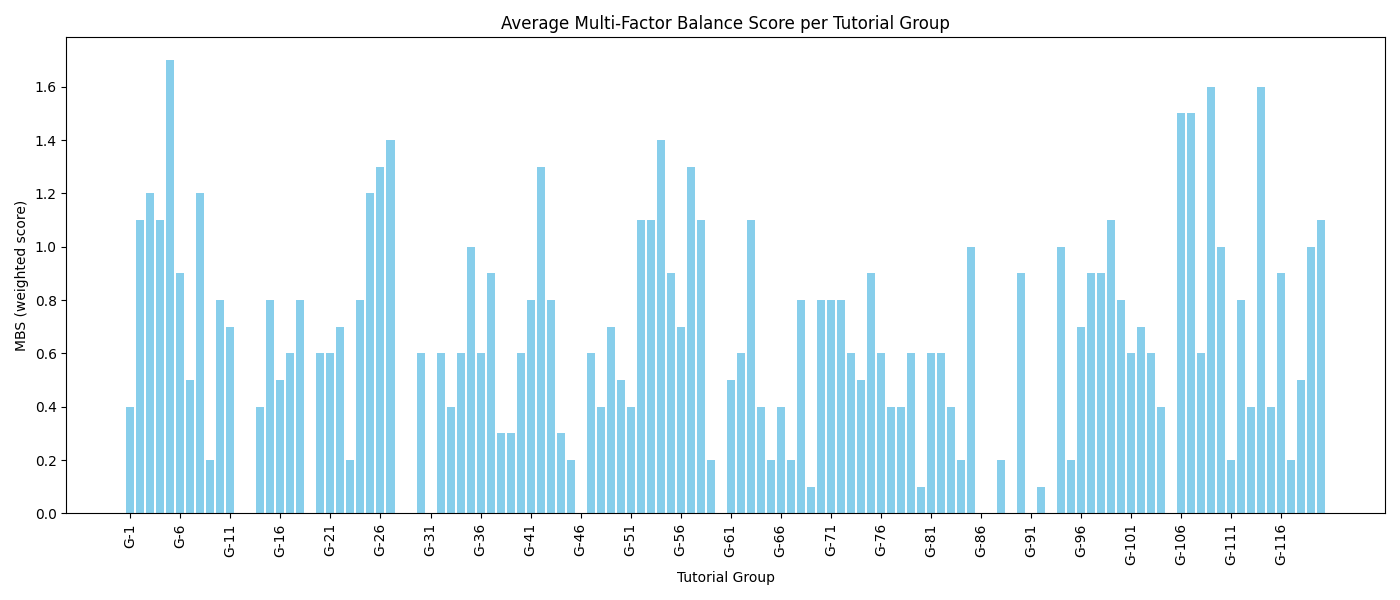



## 1. The method for deriving these values are by taking the violation scores that we also used to determine if we should swap the members or not and dividing it by the number of teams there are per tutorial group, with lower values being better
## 2. We can also see even after the sorting, some groups still have higher violation values, which may be due to the inherent limited diversity the starting tutorial group had so it would be impossible to fully sort them



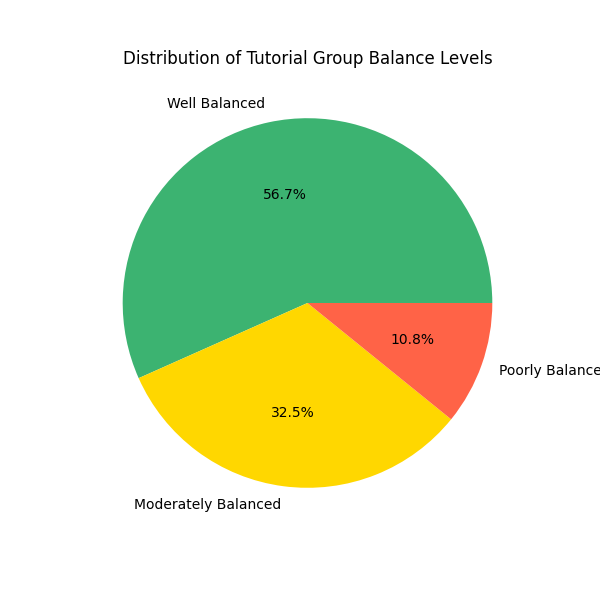

## 1. The way the pie chart was sorted would be: Well balanced (0 to 0.29), moderately balanced (0.30 to 0.69) and poorly balanced (more than  or equal to 0.7)

## 2. The distribution shows that a majority of tutorial groups fall under the well balanced category, which reflects the effectiveness of the optimisation algorithm

## 3. The presence of a small group of poorly balanced group is expected and is due to naturally skewed populations

# Challenges

##1)Extremely long run time
Initially our run time was beyond 5 minutes! This was due to our nested loops structure which leads to combinatorial explosion: If each group has ~20 teams of 5 students, that's 20^2*5^2=10,000 swaps per iterations per tutorial group, for up to 6000 iteration

In [ ]:
for a_idx, team_a in enumerate(teams):
    for b_idx in range(a_idx + 1, len(teams)):
        for i in range(len(team_a)):
            for j in range(len(team_b)):
                swap_members(...)


Instead of checking *every* pair of teams and every pair of members, systematically check a *few* pairs per iteration

##2)Diversity and fairness
Not all the groups could meet be sorted in a way that there is 0 violations.  Since we are constrained to swapping within turtorial group, the pool is small and swapping from 1 team to another may cause more violations in the other group. Hence there will be some groups with slight levels of violations as not every tutorial group has eg.equal number of boys and girls.

In [ ]:
 for a_idx, team_a in enumerate(teams):
            b_idx = (a_idx + 1) % len(teams)

            # assign team A as index 0, and team B as index 1
            team_a, team_b = teams[a_idx], teams[b_idx]

# Conclusion

We solved the challenge of forming balanced student teams by applying concepts such as:

1)	Decomposition - We decomposed the problem into simpler tasks such as data loading, sorting by CGPAs, sorting by gender, ensuring that each team consists of members from different categories and team assignment.

2)	Pattern recognition enables us to identify the important aspects like school affiliation, gender and CGPA for forming the student teams.

3)	We used several helper functions to ensure that the teams were balanced and that there were minimal violations.

4)	Algorithm design provides the clear and detailed overview of the steps taken to solve this problem.

To conclude, our team allocation program distributed the students into teams of five while ensuring that fairness and diversity were maintained.


Saving records.csv to records (8).csv
Loaded 6000 student records.
moving from tutorial group G-1 to next group...
Completed in 0.01s
moving from tutorial group G-10 to next group...
Completed in 0.03s
moving from tutorial group G-100 to next group...
Completed in 0.03s
moving from tutorial group G-101 to next group...
Completed in 0.02s
moving from tutorial group G-102 to next group...
Completed in 0.02s
moving from tutorial group G-103 to next group...
Completed in 0.02s
moving from tutorial group G-104 to next group...
Completed in 0.02s
moving from tutorial group G-105 to next group...
Completed in 0.01s
moving from tutorial group G-106 to next group...
Completed in 0.07s
moving from tutorial group G-107 to next group...
Completed in 0.05s
moving from tutorial group G-108 to next group...
Completed in 0.01s
moving from tutorial group G-109 to next group...
Completed in 0.02s
moving from tutorial group G-11 to next group...
Completed in 0.02s
moving from tutorial group G-110 to next

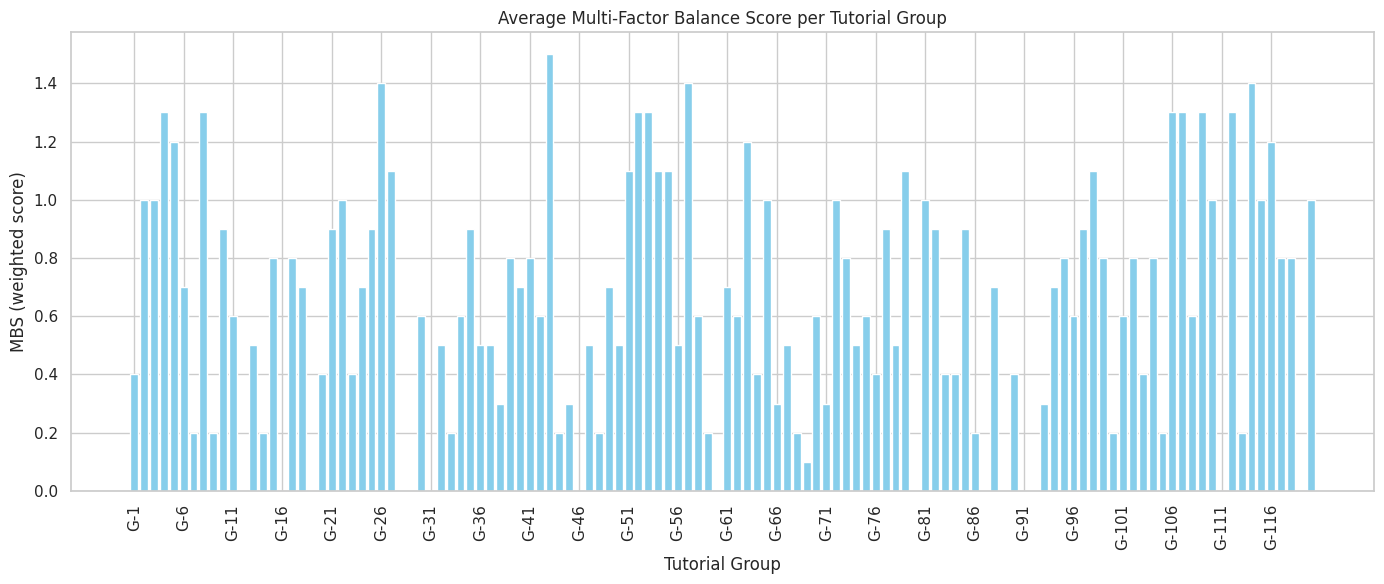

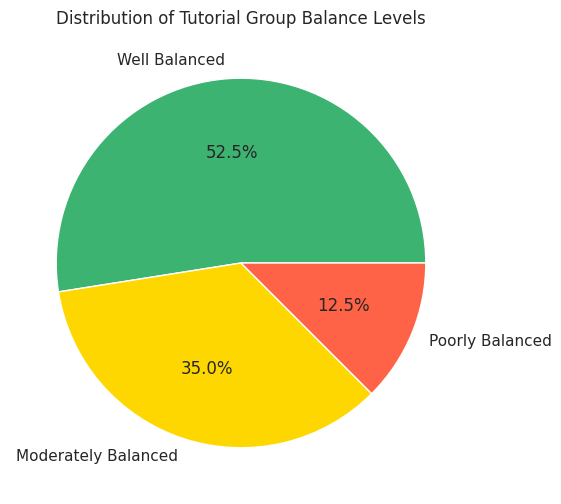

In [ ]:
import time
import random
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

# add a time counter to track the duration of the program
start = time.time()


#CHANGE INPUT AND OUTPUT PATH TO THE ONE ON YOUR COMPUTER
input_path = "C:\\Users\\junwe\\OneDrive\\Desktop\\sc1003\\records.csv"
#REMEMBER TO CHANGE THIS BEFORE RUNNING so that you get another file with the results
output_path = "C:\\Users\\junwe\\OneDrive\\Desktop\\sc1003\\FCMA_Team4_JunWeng1.csv"

# map each school to a broad category
school_category = {
    #stem
    'SCSE': 'STEM',
    'CCDS': 'STEM',
    'MAE': 'STEM',
    'EEE': 'STEM',
    'CEE': 'STEM',
    'SPMS': 'STEM',
    'MSE': 'STEM',
    'WKW SCI': 'STEM',
    'ASE': 'STEM',
    'LKCMedicine': 'STEM',
    'CoE': 'STEM',
    'CCEB': 'STEM',

    #non - stem
    'NBS': 'NON-STEM',
    'SSS': 'NON-STEM',
    'ADM': 'NON-STEM',
    'SoH': 'NON-STEM',
    'CoB (NBS)': 'NON-STEM',
    'SBS': 'NON-STEM',
    'NIE': 'NON-STEM',
    'HASS': 'NON-STEM'

}


# Expected headers
expected_cols = ['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA']

#Load data into dictionary
rows = []
with open(input_path, newline='') as student_file:

    # create an iterator that reads each line of CSV file as a list of strings
    reader = csv.reader(student_file)

    '''
    advance the internal reader by one row, and store the first row as a LIST to the variable header
    so that you can skip the first row of the file(which does not contain data
    '''
    header = next(reader)
    header_map = {}
    # i refers to the index, h refers to the element in the created list of variable reader
    for i, h in enumerate(header):#enumerate means to add 1/2/3 for every header
        # create a dictionary with key that is the element, value is the index
        header_map[h.strip().lower()] = i

    '''
    {key expression : value expression for item in iterable}

    1. assign the elements inside the list expected_cols as the key,
    value of the corresponding key is the value from ->

    2. looking for the key that is lowercase and same name as the element inside header_map, and assign the
    value of that key-value pair inside header_map to the value of the
    key-value pair of the expected_cols list.

    3. now assign the new key and values to the dictionary called idx
    '''
    idx = {col: header_map[col.lower()] for col in expected_cols}

    for r in reader:
        if len(r) < len(header):
            continue
        cgpa_str = r[idx['CGPA']].strip()
        if not cgpa_str:
            continue
        try:
            cgpa = float(cgpa_str)
        except ValueError:
            continue
        gender = r[idx['Gender']].strip()#.strip allows you to remove any whitespaces when finding word

        school = r[idx['School']].strip()

        # output unknown if the category is not found in the dictionary
        category = school_category.get(school, 'UNKNOWN')

        #add all the different headers and respective elements into the row list
        rows.append({
            'Tutorial Group': r[idx['Tutorial Group']].strip(),
            'Student ID': r[idx['Student ID']].strip(),
            'Name': r[idx['Name']].strip(),
            'School': school,
            'Category': category,
            'Gender' : gender,
            'CGPA': cgpa
        })


print(f"Loaded {len(rows)} student records.")#to confirm thay the above codes work and that rows have the correct number of students


# --- Group by Tutorial Group ---
groups = {}
for row in rows:#rows is dictionary that represents student record's
    tg = row['Tutorial Group']#next lines explain how to group each student into their respective Tutorial groups. If they are the first member in the group, a new a new empty set is created
    if tg not in groups:
        groups[tg] = []
    groups[tg].append(row)

# --- Helper Functions ---

def sorting_of_cgpa_list(student_list):
    """Return a list interleaving low/high CGPA to spread ability."""
    sorted_list = sorted(student_list, key=lambda x: x['CGPA']) #sorts the student_list in ascending order
    mid = (len(sorted_list) + 1) // 2  # find the middle point of the list which separates the higher half and bottom half
    low_list = sorted_list[:mid]       # Lower half (lowest CGPAs)
    high_list = sorted_list[mid:]      # Higher half (highest CGPAs)
    ordered = []
    for low_student, high_student in zip(low_list, high_list): # zip allows u to pair low_list with high_list student
        ordered.append(low_student)
        ordered.append(high_student)

    if len(low_list) > len(high_list):#in case there is more low students in low_list of students in either list, add the extra lowlist in the end
        ordered.append(low_list[-1])


    return ordered

def count_values(items):
    counts = {}
    for i in items:
        counts[i] = counts.get(i, 0) + 1#tries to get a current count of each unique 'i' in the dictionary. If 'i' is not found it returns to 0 as default.

    return counts

def team_has_category_majority(team):# if there is more than 3 students in the same course
    categories = []
    for m in team:
        categories.append(m['Category'])
    for v in count_values(categories).values():
        if v > 3:
            return True
    return False


def team_has_gender_majority(team):# if there is more than 4 students with the same gender
    genders = []
    for m in team:
        genders.append(m['Gender'])
    for v in count_values(genders).values():
        if v > 3:
            return True
    return False

def team_is_cgpa_predominant(team, top_set, bottom_set):#checks the top 20% extremes from both ends
    top_count = 0
    for m in team:
        if m['Student ID'] in top_set:
            top_count += 1

    bottom_count = 0# Count how many students in the team are from the bottom 20% CGPA group
    for m in team:
        if m['Student ID'] in bottom_set:
            bottom_count += 1

    if top_count >= 3 or bottom_count >= 3: # Return True if 4 or more students are from either extreme group
        return True
    else:
        return False



def assess_group_violations(teams, top_set, bottom_set):
    gender_majority_count = 0
    cgpa_predominant_count = 0
    category_majority_count = 0

# check the teams for any violation
    for team in teams:
        if team_has_category_majority(team):
            category_majority_count += 1
        if team_has_gender_majority(team):
            gender_majority_count += 1
        if team_is_cgpa_predominant(team, top_set, bottom_set):
            cgpa_predominant_count += 1

    return { # Return a dictionary with total counts of each violation
        'category_majority': category_majority_count,
        'gender_majority': gender_majority_count,
        'cgpa_predominant': cgpa_predominant_count
    }

def team_is_stable(team, top_set, bottom_set):
    return (
        not team_has_gender_majority(team) and
        not team_has_category_majority(team) and
        not team_is_cgpa_predominant(team, top_set, bottom_set)
    )


def ceil_div(a, b): #this helps to exactly count the correct number of teams. Issue is that // function rounds down, but if there is ex. 2.65 groups required from division, then I would want to round up to 3 groups not down to 2 groups
    return (a + b - 1) // b

def make_stratified_teams(students, size=5):
    strata = defaultdict(list)
    for s in students:
        strata[(s['Gender'], s['Category'])].append(s)
    for key in strata:
        strata[key].sort(key=lambda x: x['CGPA'], reverse=True)
    num_teams = ceil_div(len(students), size)
    teams = [[] for _ in range(num_teams)]
    team_cycle = itertools.cycle(range(num_teams))
    for group in strata.values():
        for student in group:
            team_idx = next(team_cycle)
            teams[team_idx].append(student)
    return teams

def swap_members(team_a, i, team_b, j): #this us used for exchange of members within groups so lower the team assignment violations
    team_a[i], team_b[j] = team_b[j], team_a[i]

final_rows = []
summary = {}

for tg, students in groups.items():

    # Start a time counter for within the group too to check if the program is working
    time_group_start = time.time()
    n = len(students)
    if n == 0:
        continue

    # Determine top/bottom 20% for CGPA

    # use sorted() to sort the list of dictionaries based on CGPA and in descending order
    sorted_by_cgpa = sorted(students, key=lambda x: x['CGPA'], reverse=True)

    # identify the top 20% of students and ensure that there is at least 1 student
    top_cut = max(1, ceil_div(2 * n, 10))  # equivalent to math.ceil(0.2 * n)

    # build a set of student ids for the top 20% of students, slice list at the top 20%
    # in s, retrieve the value under the key of Student ID
    top_set = set(s['Student ID'] for s in sorted_by_cgpa[:top_cut])

    # build a set of student ids for the bottom 20% of students, slice list at the bottom 20%
    # in s, retrieve the value under the key of Student ID
    bottom_set = set(s['Student ID'] for s in sorted_by_cgpa[-top_cut:])

    # Initial teams
    # Pre-balance the order of students before team creation, by sorting so that allocation can be done in round robin
    # the minus sign before s['CGPA'] allows sorting in descending order, similar to reverse = True
    students.sort(key=lambda s: (s['Gender'], s['Category'], -s['CGPA']))

    # Build initial teams with slight randomness
    teams = make_stratified_teams(students, size=5)

    # Shuffle the order of members in existing groups in place, does not exchange members to other groups yet

    for t in teams:
        random.shuffle(t)

    # Try to reduce constraint violations
    # main idea is to find groups that satisfy the three conditions and lock them to prevent further

    # create a list that keeps track of the teams that are locked
    team_locked = [False] * len(teams)

    # set a max limit to prevent loop from running infinitely, longer will have more optimisation but will take longer
    max_iters = 6000
    stable_count = 0

    # we use _ and not i as we just need it to loop, the index does not matter.
    for _ in range(max_iters):

        # loop through each team in teams,
        violations = assess_group_violations(teams, top_set, bottom_set)

        # get the sum of all the values in the dictionary of violations
        total = sum(violations.values())
        if total == 0 or all(team_locked):
             break

        improved = False

        # compare with the team next door, instead of comparing every single team
        # against each other which can help to reduce runtime
        for a_idx, team_a in enumerate(teams):
            # next team team in the list, %len will allow it to loop around from last to first
            b_idx = (a_idx + 1) % len(teams)
            team_a, team_b = teams[a_idx], teams[b_idx]

            # loop through the 5 members of A and compare it 1 by 1 with all 5 members of B, 25 comparisons
            for i in range(len(team_a)):
                    for j in range(len(team_b)):
                        before = (
                            2*int(team_has_category_majority(team_a)) +
                            3*int(team_has_gender_majority(team_a)) +
                            int(team_is_cgpa_predominant(team_a, top_set, bottom_set)) +

                            2*int(team_has_category_majority(team_b)) +
                            3*int(team_has_gender_majority(team_b)) +
                            int(team_is_cgpa_predominant(team_b, top_set, bottom_set))
                        )
                        swap_members(team_a, i, team_b, j)
                        after = (
                            2*int(team_has_category_majority(team_a)) +
                            3*int(team_has_gender_majority(team_a)) +
                            int(team_is_cgpa_predominant(team_a, top_set, bottom_set)) +

                            2*int(team_has_category_majority(team_b)) +
                            3*int(team_has_gender_majority(team_b)) +
                            int(team_is_cgpa_predominant(team_b, top_set, bottom_set))
                        )

                        #accept slightly worse swap 3% of the time to encourage other outcomes
                        #generate a floating point number between 0.0 to 1.0

                        if after > before and random.random() > 0.03:
                            swap_members(team_a, i, team_b, j)
                        else:
                            improved = True # means a beneficial or accepted swap occurred


        for idx, t in enumerate(teams):
            if not team_locked[idx] and team_is_stable(t, top_set, bottom_set):
                # lock the specific team based on the index within the tutorial group
                team_locked[idx] = True

        # check if every element in the list is True, if it is then stop optimising for that particular
        # tutorial group
        if all(team_locked):
            break

        # track how many iterations in a row went by with no improvements found
        # if no improvements found in 16 tries then break
        if not improved:
            stable_count += 1
            if stable_count > 16:
                    break
        else:
            stable_count = 0

    # records all the remaining constraint violations as a dictionary and is saved in the summary dictionary under the tutorial group name
    summary[tg] = assess_group_violations(teams, top_set, bottom_set)
    team_num = 1

    # iterate through the members in each team, and append the list of values into the final_rows list
    for team in teams:
        for member in team:
            final_rows.append([
                tg,
                member['Student ID'],
                member['Name'],
                member['School'],
                member['Category'],
                member['Gender'],
                f"{member['CGPA']:.2f}",
                f"Team {team_num}"
            ])
        team_num += 1
    print("moving from tutorial group", tg, "to next group...")
    print(f"Completed in {time.time()-time_group_start:.2f}s")

'''
1.   with open as csv_file ensures that the file is closed even though there might be an error
2. w is write mode, newline = '' prevents extra lines and it is encoded in utf-8
3. ensure that the output path is different from input path or else it will overwrite the original file
'''
with open(output_path, 'w', newline='', encoding='utf-8') as records_output_file:
    # use the built in python function csv.writer to format the opened file as CSV

    # take the headers and write into the file as CSV format
    # add the string 'team assigned' wwhich is within a list and add it to the other list

    writer = csv.writer(records_output_file)
    writer.writerow(expected_cols[:4] + ['Category'] + expected_cols[4:] + ['Team Assigned'])
    writer.writerows(final_rows)

### 1. tell user when the process is done
### 2. tell user where to locate the file
### 3. tell user how many students there were
### 4. tell user how many tutorial groups there were
### 5. print new row, about any possible violations
### 6. summary of the violations
### 7. Explain the constraints of our code, and improvements in runtime

print("\n✅ Team assignment complete.")
print(f"Saved to: {output_path}")
print(f"Entire program completed in {time.time()-start:.2f}s")
print(f"Total students assigned: {len(final_rows)}")
print(f"Tutorial groups processed: {len(summary)}")
print("\n--- Summary of Violations ---")
for tg, v in summary.items():
    print(f"{tg}: Category={v['category_majority']} | Gender={v['gender_majority']} | CGPA={v['cgpa_predominant']}")


# READ THE FINAL OUTPUT CSV
with open(output_path, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)

    idx_group = header.index("Tutorial Group")
    idx_team  = header.index("Team Assigned")
    idx_id    = header.index("Student ID")
    idx_cat   = header.index("Category")
    idx_gender = header.index("Gender")
    idx_cgpa   = header.index("CGPA")

    data = [row for row in reader]


# Recompute Top/Bottom CGPA sets
students_by_tg = defaultdict(list)
for row in data:
    tg = row[idx_group]
    students_by_tg[tg].append(row)

def compute_top_bottom(students):
    # Create pairs (ID, GPA)
    arr = [(s[idx_id], float(s[idx_cgpa])) for s in students]
    arr.sort(key=lambda x: x[1], reverse=True)

    n = len(arr)
    top_cut = max(1, (2*n + 9)//10)  # ceil(0.2n)

    top_ids = set(s[0] for s in arr[:top_cut])
    bottom_ids = set(s[0] for s in arr[-top_cut:])
    return top_ids, bottom_ids

top_bottom_lookup = {
    tg: compute_top_bottom(lst) for tg, lst in students_by_tg.items()
}


# SUPPORT FUNCTIONS
def count_values(seq):
    counts = {}
    for s in seq:
        counts[s] = counts.get(s,0) + 1
    return counts


# Multi-Factor Balance Score (with custom WEIGHTS)
WEIGHT_GENDER   = 3
WEIGHT_CATEGORY = 2
WEIGHT_CGPA     = 1

def mbs_score(team_rows, tg):
    top_set, bottom_set = top_bottom_lookup[tg]

    cats = [r[idx_cat] for r in team_rows]
    genders = [r[idx_gender] for r in team_rows]
    ids = [r[idx_id] for r in team_rows]

    score = 0

    # Category majority (>=4 same)
    if max(count_values(cats).values()) > 3:
        score += WEIGHT_CATEGORY

    # Gender majority (>=4 same)
    if max(count_values(genders).values()) > 3:
        score += WEIGHT_GENDER

    # CGPA extreme imbalance (>=3 top or >=3 bottom)
    top_count = sum(1 for i in ids if i in top_set)
    bottom_count = sum(1 for i in ids if i in bottom_set)
    if top_count >= 3 or bottom_count >= 3:
        score += WEIGHT_CGPA

    return score


# COMPUTE per-team scores and then per-TG averages
teams = defaultdict(list)
for row in data:
    tg = row[idx_group]
    team = row[idx_team]
    teams[(tg, team)].append(row)

tg_scores = defaultdict(list)

for (tg, team), members in teams.items():
    tg_scores[tg].append(mbs_score(members, tg))

tg_avg = {tg: sum(scores)/len(scores) for tg, scores in tg_scores.items()}


# SORT TGs 1 → 120
def numeric_tg(tg_name):
    return int(tg_name.split('-')[1])

ordered_tg = sorted(tg_avg.keys(), key=numeric_tg)
ordered_avg = [tg_avg[tg] for tg in ordered_tg]


# CLASSIFICATION (50% GOOD, small poor)
# Automatically determine thresholds
values_sorted = sorted(ordered_avg)

# 50% good
limit_good = values_sorted[int(0.50 * len(values_sorted))]

# next ~35-40% moderate
limit_moderate = values_sorted[int(0.85 * len(values_sorted))]

# poorly balanced: top 15%
# (guaranteed small portion)
well = []
moderate = []
poor = []

for tg in ordered_tg:
    value = tg_avg[tg]
    if value <= limit_good:
        well.append(tg)
    elif value <= limit_moderate:
        moderate.append(tg)
    else:
        poor.append(tg)



# BAR CHART: AVERAGE MULTI-FACTOR BALANCE SCORE (1→120)


plt.figure(figsize=(14,6))
plt.bar(range(len(ordered_tg)), ordered_avg, color="skyblue")

# X-axis labels every 5 groups
plt.xticks(
    range(0, len(ordered_tg), 5),
    [ordered_tg[i] for i in range(0, len(ordered_tg), 5)],
    rotation=90
)

plt.title("Average Multi-Factor Balance Score per Tutorial Group")
plt.xlabel("Tutorial Group")
plt.ylabel("MBS (weighted score)")
plt.tight_layout()
plt.show()

# PIE CHART: WELL / MODERATE / POOR SPLIT

sizes = [len(well), len(moderate), len(poor)]
labels = ["Well Balanced", "Moderately Balanced", "Poorly Balanced"]
colors = ["mediumseagreen", "gold", "tomato"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Tutorial Group Balance Levels")
plt.show()


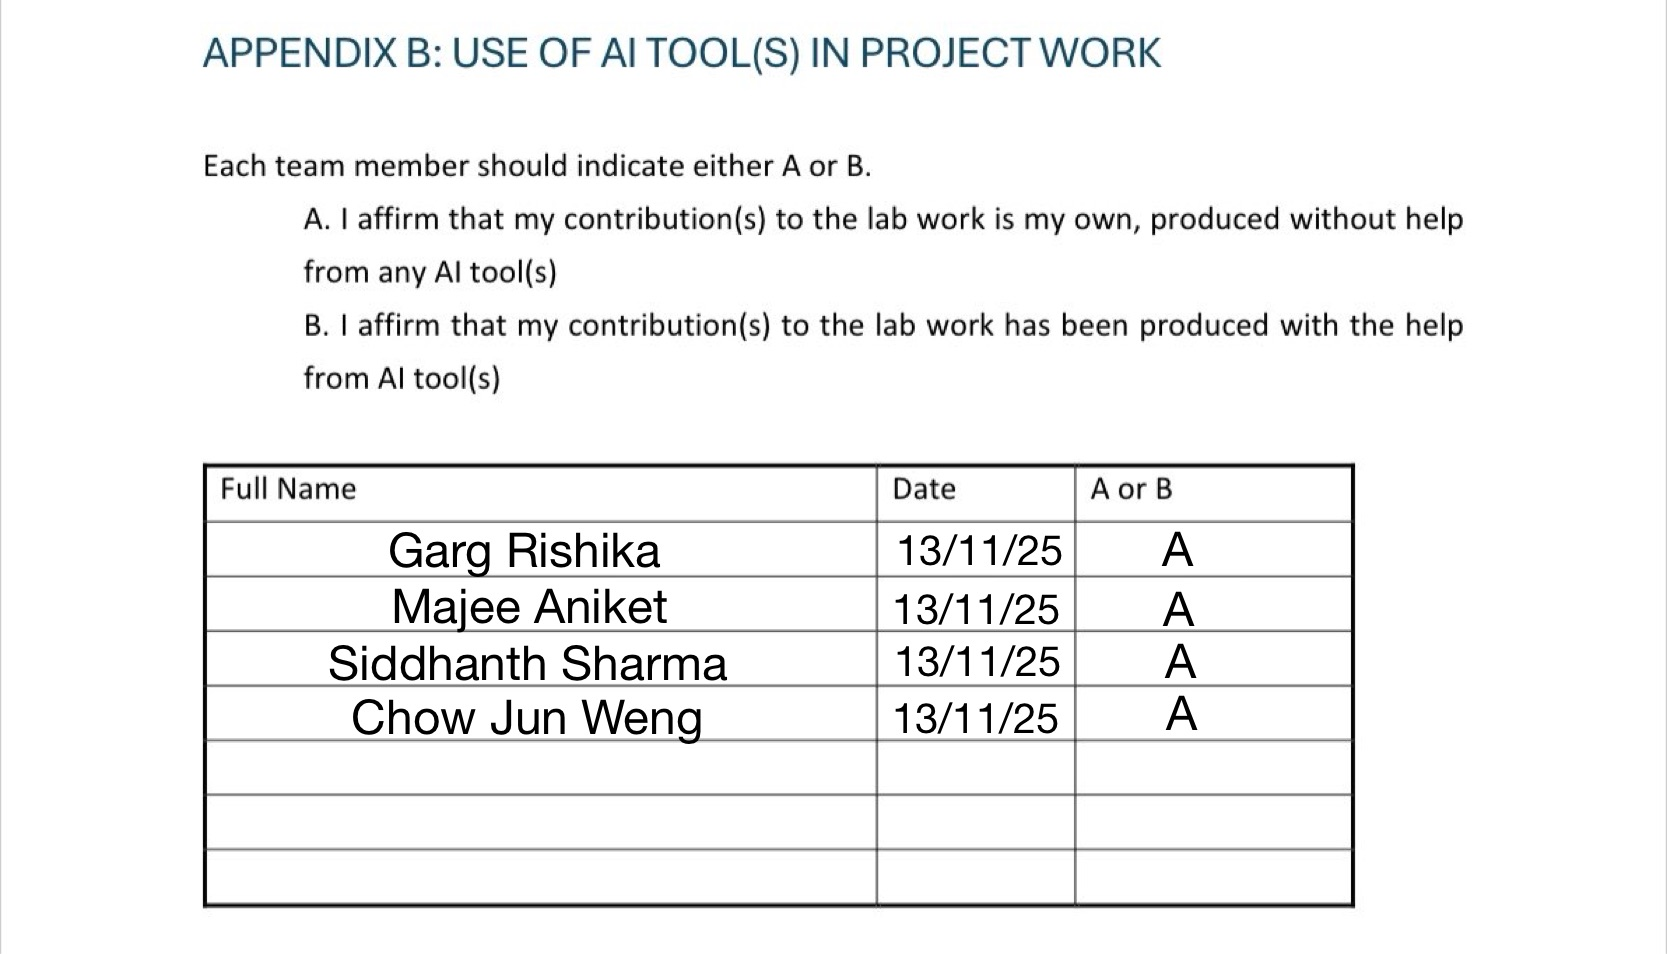